## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
# import from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [2]:
# load dataset from google drive /Mydrive/Colab/ML Proj 2/Loan_Modelling.csv
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab/ML Proj 2/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [3]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

# Univariate Analysis
## Mortgage Distribution


Descriptive statistics for 'Mortgage':
count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


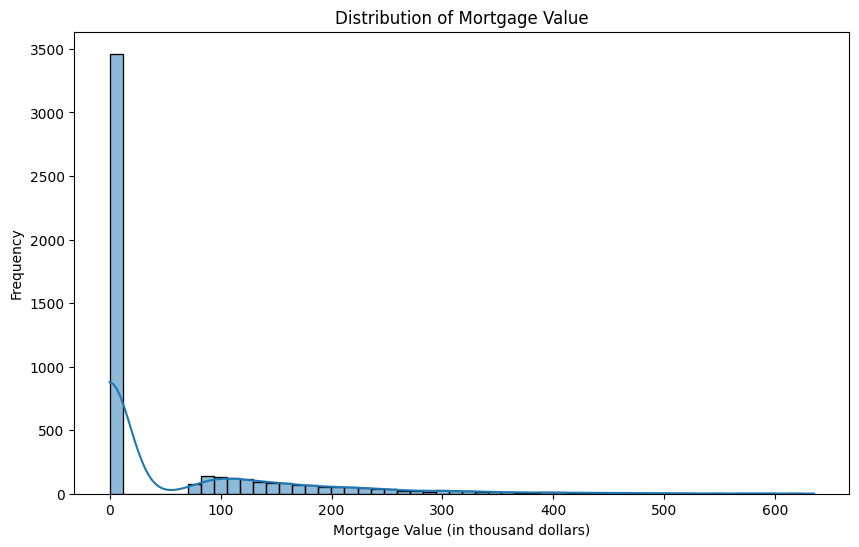

In [8]:
print("\nDescriptive statistics for 'Mortgage':")
print(df['Mortgage'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage Value')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

Discussion of Mortgage Distribution:
The histogram and descriptive statistics show the distribution of the 'Mortgage' attribute.
The distribution is heavily skewed to the right, indicating that a large number of customers have no or a very small mortgage value.
The median mortgage value is 0.0, while the mean is 56.50. This large difference further highlights the skewness.
The maximum mortgage value is 635, indicating the presence of customers with very high mortgage values.
The presence of a significant number of customers with a mortgage value of 0 suggests a large proportion of the dataset represents individuals who do not own a home with a mortgage, or perhaps own their homes outright.
Outliers are likely present on the higher end of the distribution due to the long tail.
This skewness might require transformation if used in certain models.

In [9]:
credit_card_customers = df[df['CreditCard'] == 1].shape[0]
print(f"\nNumber of customers with credit cards: {credit_card_customers}")

total_customers = df.shape[0]
print(f"Total number of customers: {total_customers}")

percentage_with_credit_card = (credit_card_customers / total_customers) * 100
print(f"Percentage of customers with credit cards: {percentage_with_credit_card:.2f}%")


Number of customers with credit cards: 1470
Total number of customers: 5000
Percentage of customers with credit cards: 29.40%



Univariate Analysis on Numerical Columns:

--- Age ---
Descriptive Statistics for 'Age':
count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


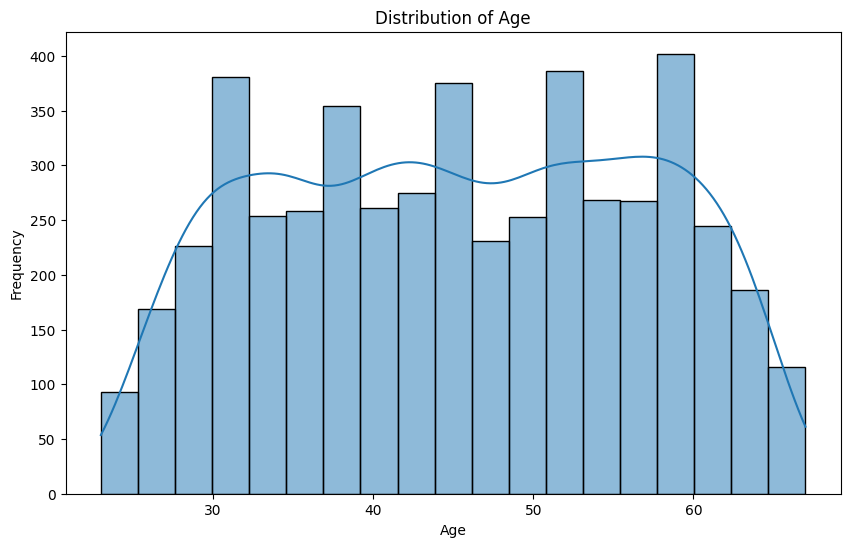


--- Experience ---
Descriptive Statistics for 'Experience':
count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


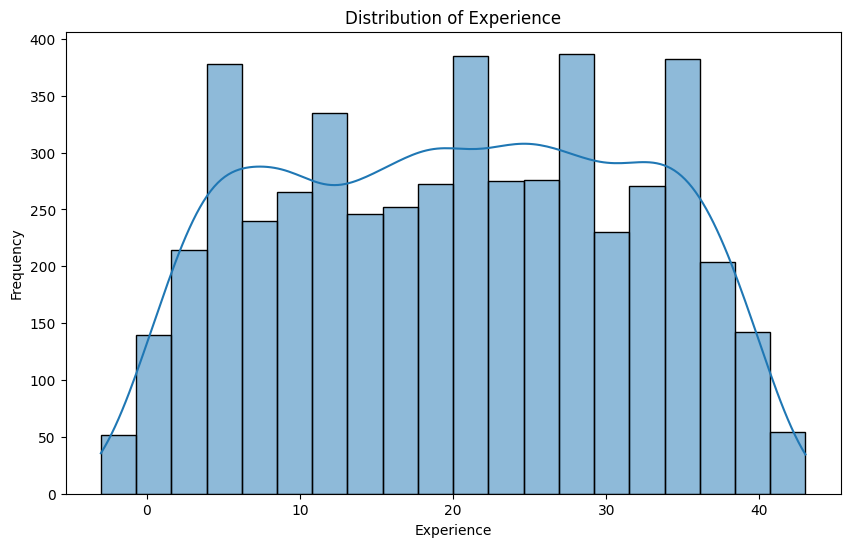


--- Income ---
Descriptive Statistics for 'Income':
count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


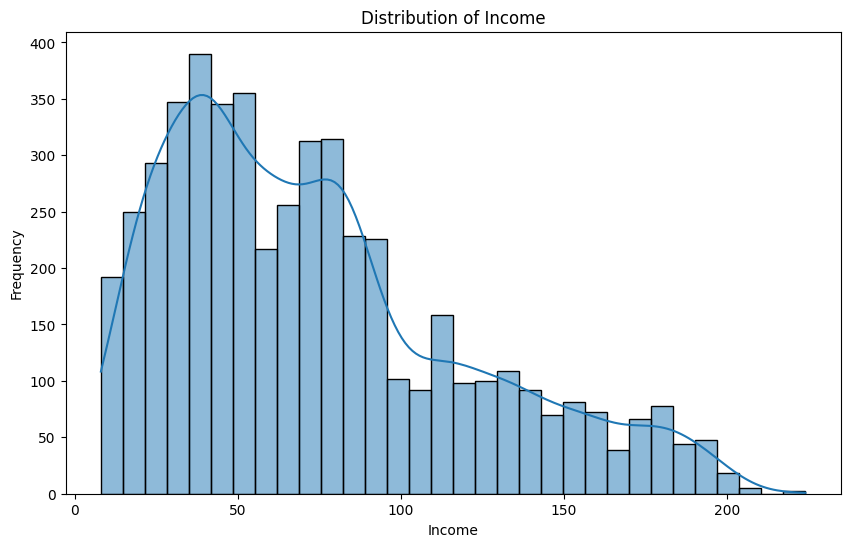


--- CCAvg ---
Descriptive Statistics for 'CCAvg':
count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64


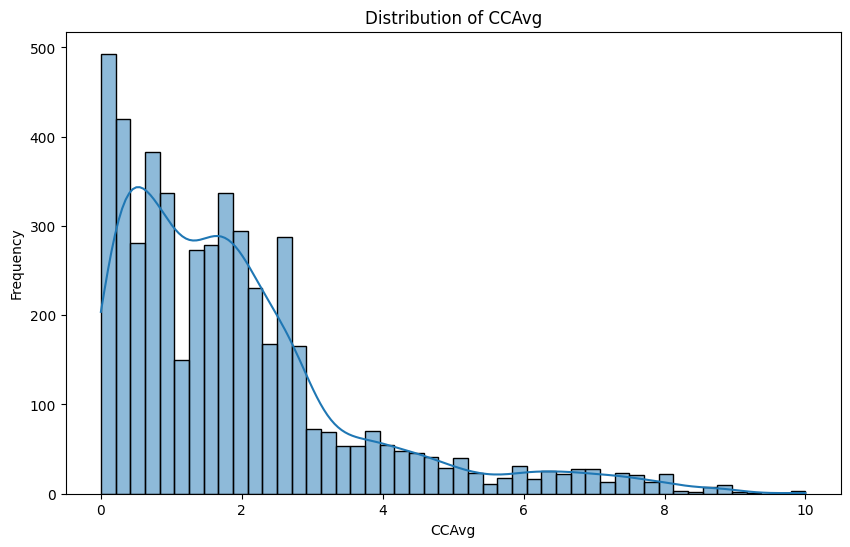

In [10]:
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg']

print("\nUnivariate Analysis on Numerical Columns:")
for col in numerical_cols:
    print(f"\n--- {col} ---")
    print(f"Descriptive Statistics for '{col}':")
    print(df[col].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Univariate Analysis on Categorical Columns:

--- Education ---
Value Counts for 'Education':
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64


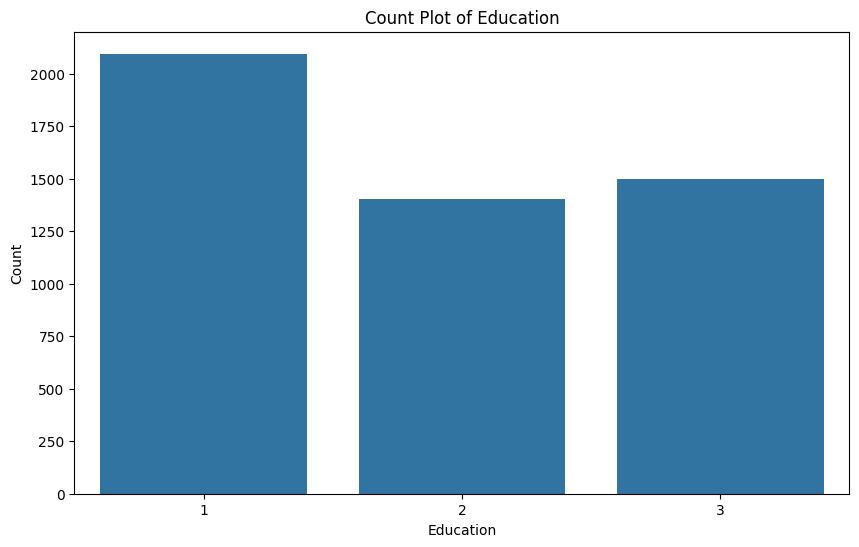


--- Family ---
Value Counts for 'Family':
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


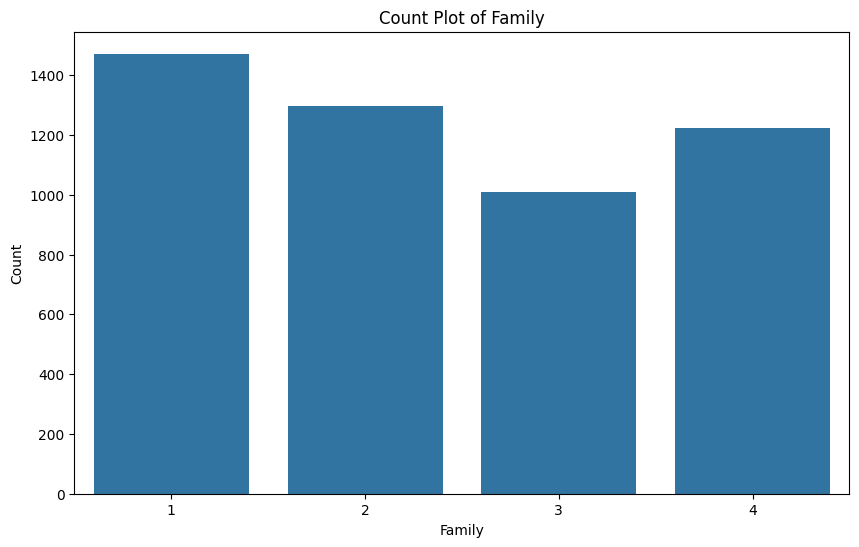


--- Securities_Account ---
Value Counts for 'Securities_Account':
Securities_Account
0    4478
1     522
Name: count, dtype: int64


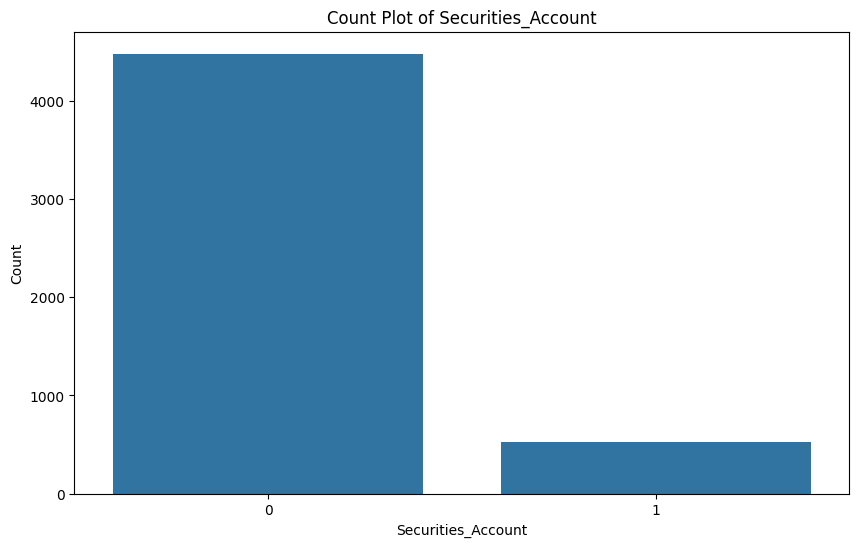


--- CD_Account ---
Value Counts for 'CD_Account':
CD_Account
0    4698
1     302
Name: count, dtype: int64


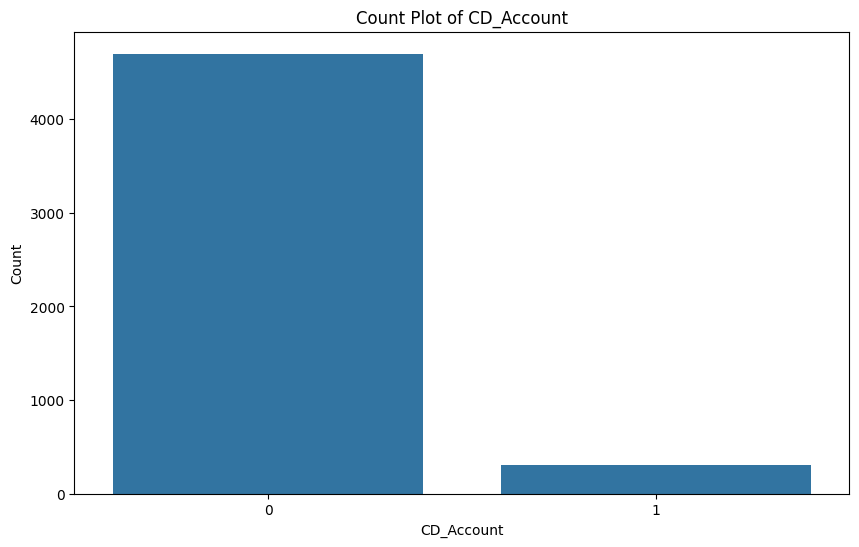


--- Online ---
Value Counts for 'Online':
Online
1    2984
0    2016
Name: count, dtype: int64


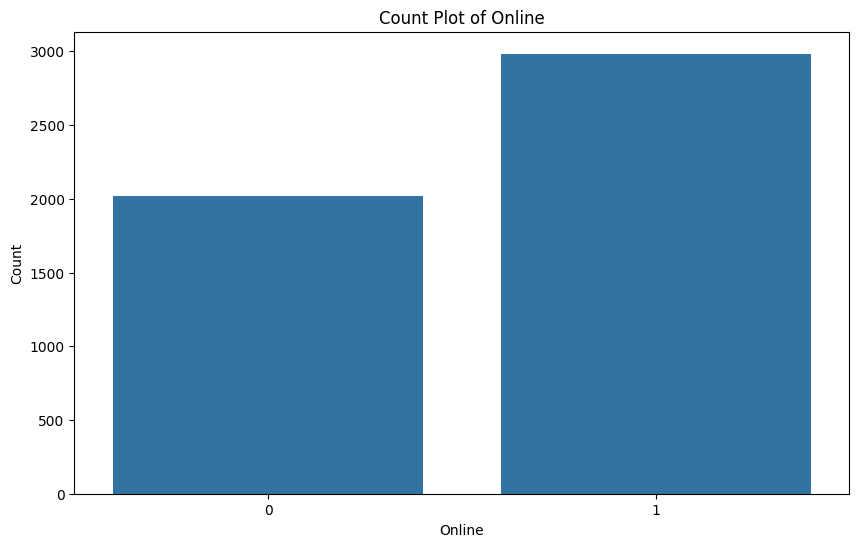

In [11]:
categorical_cols = ['Education', 'Family', 'Securities_Account', 'CD_Account', 'Online']

print("\nUnivariate Analysis on Categorical Columns:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Value Counts for '{col}':")
    print(df[col].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### After checking out each feature individually, here's what we found:

* **Mortgage**: Lots of customers (most, actually) have no mortgage. For those who do, values vary a lot, with some really high ones.

* **Credit Card Customers**: We saw how many customers use an outside credit card. It's a clear split between yes/no.

* **Income & CCAvg**: Both typically have a lot of lower values, but a few customers earn or spend a lot.

* **Age & Experience**: These look pretty spread out, covering a good range of customers.

* **Other Categorical**: For `Education`, `Family`, `Securities_Account`, and the `CD_Account` features, we saw the proportions for each group. This helps us understand our customer base.

# Bivariate Analysis
## Correlation with Target

In [12]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

print("\nCorrelation Matrix for Numerical Attributes:")
print(correlation_matrix)

personal_loan_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

print("\nCorrelation with Personal_Loan:")
print(personal_loan_correlation)


Correlation Matrix for Numerical Attributes:
                          ID       Age  Experience    Income   ZIPCode  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.002240   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.030530   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.030456   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.030709   
ZIPCode             0.002240 -0.030530   -0.030456 -0.030709  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.027512   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.012188   
Education           0.021463  0.041334    0.013152 -0.187524 -0.008266   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.003614   
Personal_Loan      -0.024801 -0.007726   -0.007413  0.502462 -0.002974   
Securities_Account -0.016972 -0.000436   -0.001232 -0.002616  0.002422   
CD_Account         -0.006909  0.008043    0.010353  0.169738  0.02

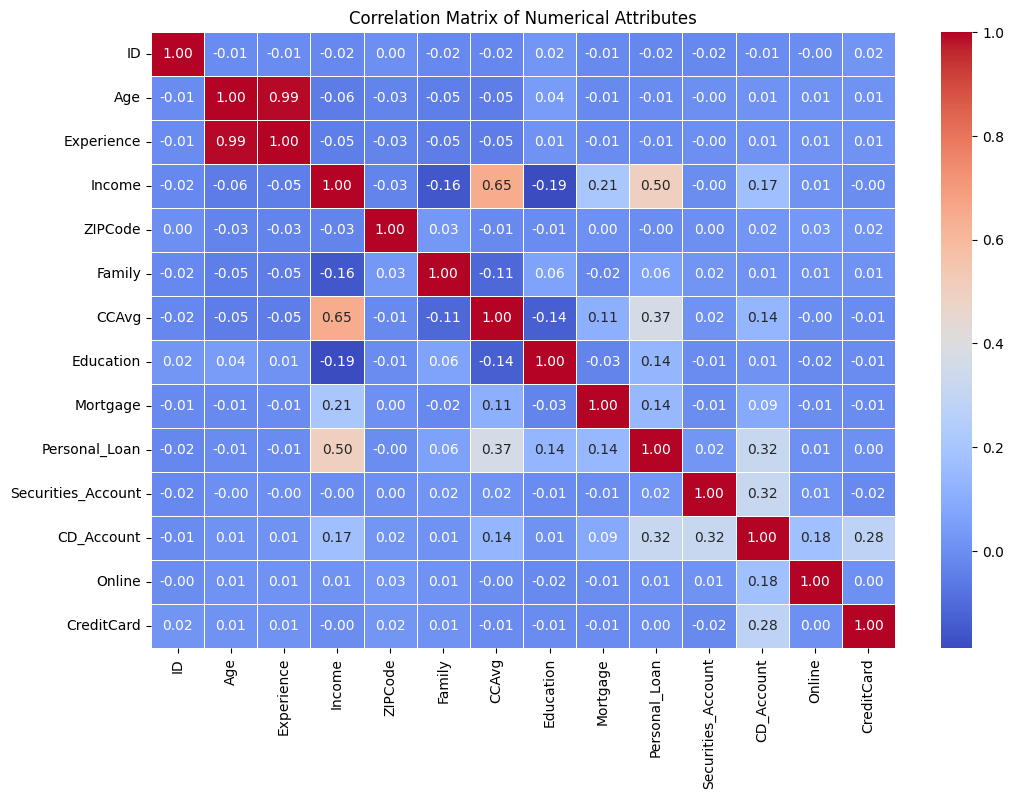

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [14]:
top_correlations = personal_loan_correlation.drop('Personal_Loan')
top_5_positive = top_correlations[top_correlations > 0].nlargest(5)
top_5_negative = top_correlations[top_correlations < 0].nsmallest(5)

print("\nTop 5 Positive Correlations with Personal_Loan:")
print(top_5_positive)

print("\nTop 5 Negative Correlations with Personal_Loan:")
top_5_negative


Top 5 Positive Correlations with Personal_Loan:
Income        0.502462
CCAvg         0.366889
CD_Account    0.316355
Mortgage      0.142095
Education     0.136722
Name: Personal_Loan, dtype: float64

Top 5 Negative Correlations with Personal_Loan:


,Personal_Loan
ID,-0.024801
Age,-0.007726
Experience,-0.007413
ZIPCode,-0.002974


## Loan Interest vs Age

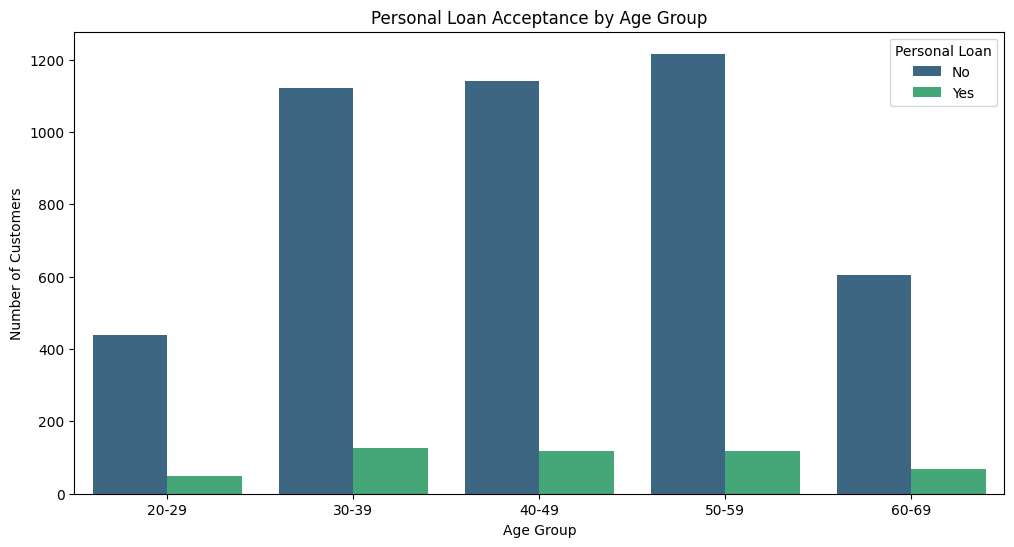

In [15]:
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Personal_Loan', data=df, palette='viridis')
plt.title('Personal Loan Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

In [16]:
age_loan_conversion = df.groupby('Age_Group', observed=False)['Personal_Loan'].value_counts(normalize=True).unstack()
age_loan_conversion['Conversion_Rate'] = age_loan_conversion[1] * 100

print("\nPersonal Loan Conversion Rate by Age Group:")
age_loan_conversion


Personal Loan Conversion Rate by Age Group:


Personal_Loan,0,1,Conversion_Rate
Age_Group,,,
20-29,0.899590,0.100410,10.040984
30-39,0.898156,0.101844,10.184443
40-49,0.906921,0.093079,9.307876
50-59,0.911544,0.088456,8.845577
60-69,0.897626,0.102374,10.237389


## Loan Interest vs Education

In [17]:
education_loan_conversion = df.groupby('Education')['Personal_Loan'].value_counts(normalize=True).unstack()
education_loan_conversion['Conversion_Rate'] = education_loan_conversion[1] * 100

print("\nPersonal Loan Conversion Rate by Education Level:")
print(education_loan_conversion)


Personal Loan Conversion Rate by Education Level:
Personal_Loan         0         1  Conversion_Rate
Education                                         
1              0.955630  0.044370         4.437023
2              0.870278  0.129722        12.972202
3              0.863424  0.136576        13.657562


<Figure size 1000x600 with 0 Axes>

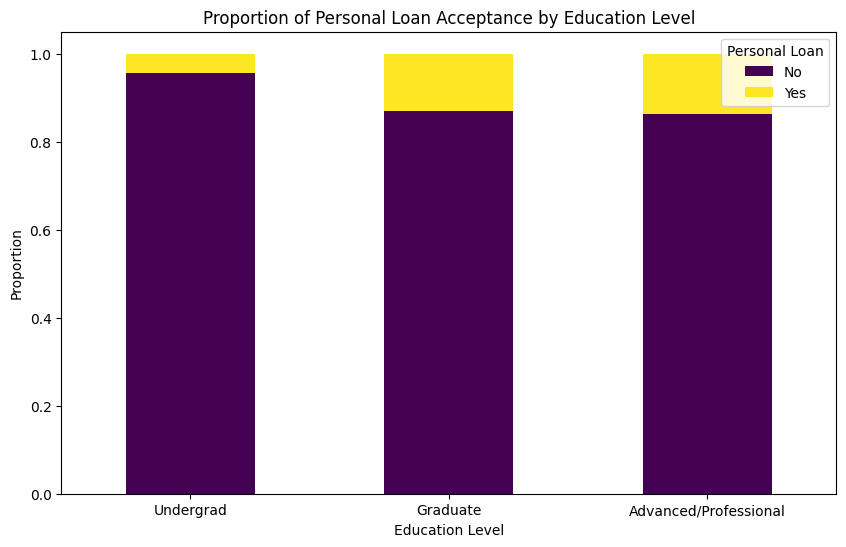

In [18]:
plt.figure(figsize=(10, 6))
education_loan_conversion[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Proportion of Personal Loan Acceptance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1, 2], labels=['Undergrad', 'Graduate', 'Advanced/Professional'], rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

In [19]:
print("\nEducation Levels with Higher Likelihood of Accepting a Loan (based on Conversion Rate):")
higher_likelihood_education = education_loan_conversion.sort_values(by='Conversion_Rate', ascending=False)
print(higher_likelihood_education[['Conversion_Rate']])


Education Levels with Higher Likelihood of Accepting a Loan (based on Conversion Rate):
Personal_Loan  Conversion_Rate
Education                     
3                    13.657562
2                    12.972202
1                     4.437023


## Other Bivariate Analyses with Personal Loan

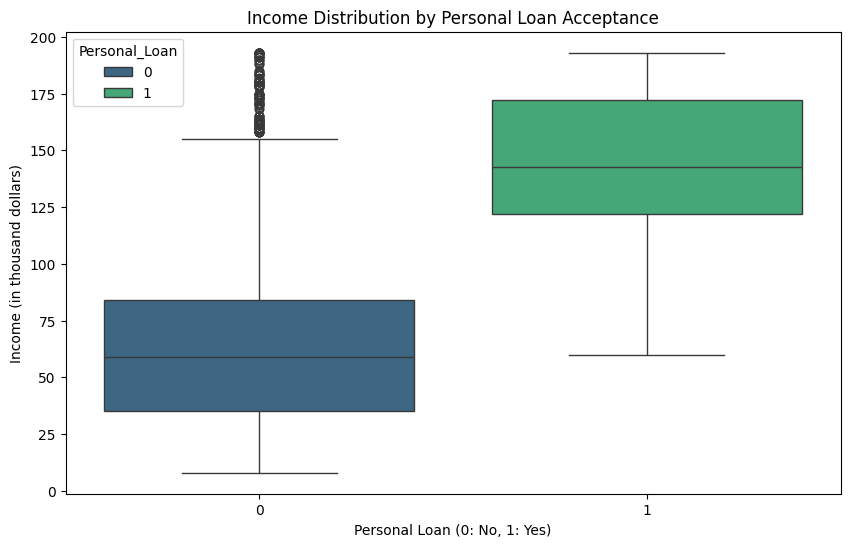

In [82]:
# Income vs. Personal_Loan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Income', hue='Personal_Loan' ,data=df, palette='viridis')
plt.title('Income Distribution by Personal Loan Acceptance')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Income (in thousand dollars)')
plt.show()

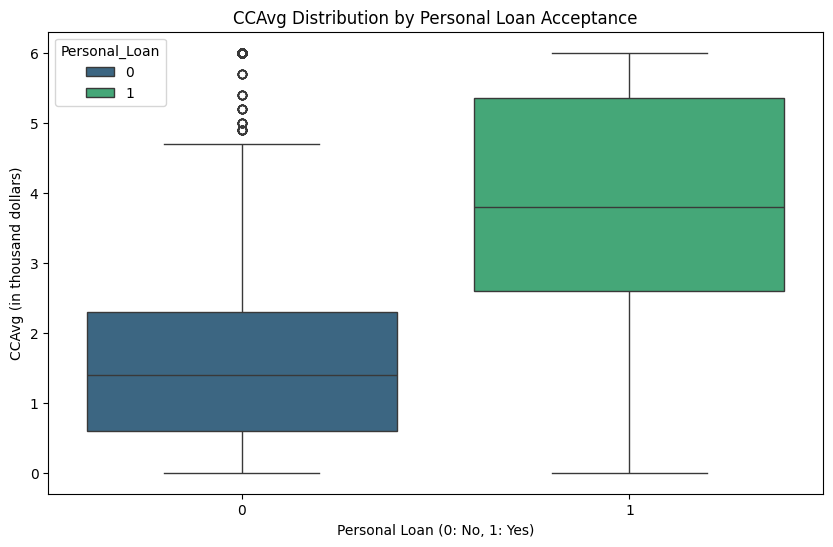

In [83]:
# CCAvg vs. Personal_Loan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='CCAvg', hue='Personal_Loan', data=df, palette='viridis')
plt.title('CCAvg Distribution by Personal Loan Acceptance')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('CCAvg (in thousand dollars)')
plt.show()

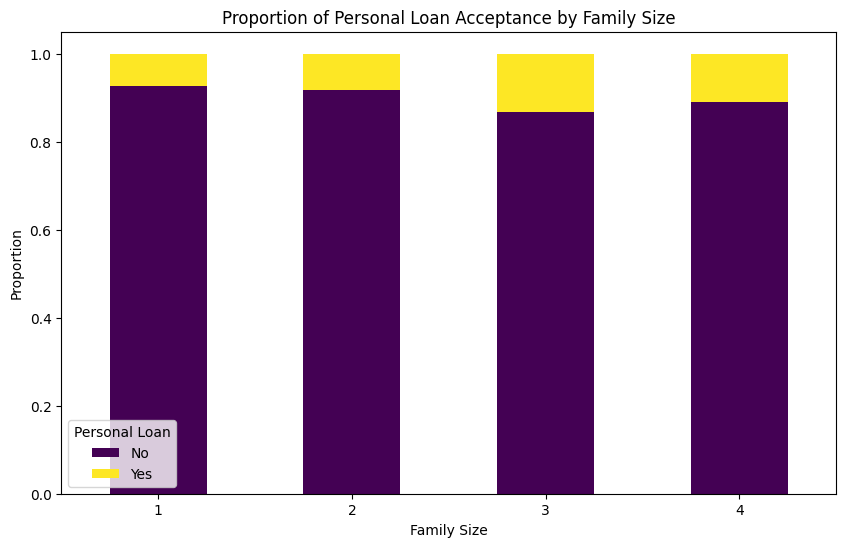

In [22]:
# Family vs. Personal_Loan (using stacked bar chart)
family_loan_conversion = df.groupby('Family')['Personal_Loan'].value_counts(normalize=True).unstack()
family_loan_conversion.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Proportion of Personal Loan Acceptance by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

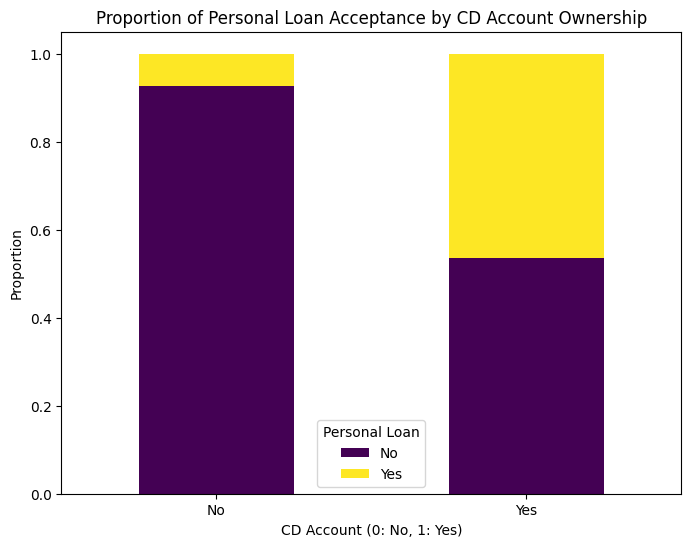

In [23]:
# CD_Account vs. Personal_Loan (using stacked bar chart)
cd_account_loan_conversion = df.groupby('CD_Account')['Personal_Loan'].value_counts(normalize=True).unstack()
cd_account_loan_conversion.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Proportion of Personal Loan Acceptance by CD Account Ownership')
plt.xlabel('CD Account (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

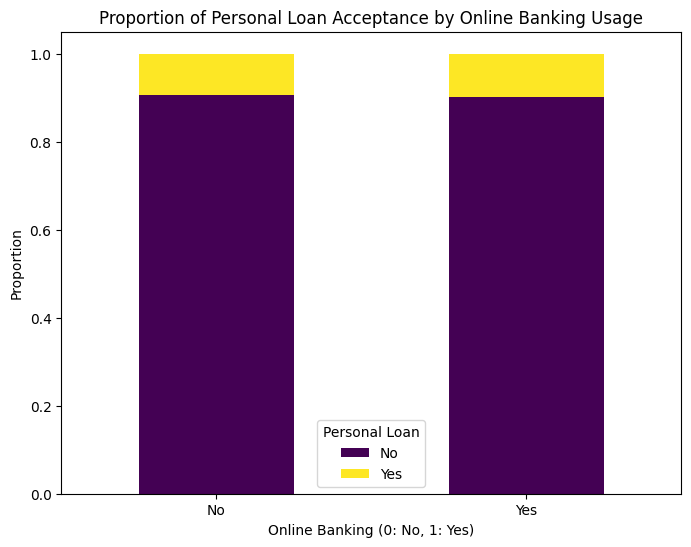

In [24]:
# Online vs. Personal_Loan (using stacked bar chart)
online_loan_conversion = df.groupby('Online')['Personal_Loan'].value_counts(normalize=True).unstack()
online_loan_conversion.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Proportion of Personal Loan Acceptance by Online Banking Usage')
plt.xlabel('Online Banking (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

#### We looked at how features relate to each other, especially to `Personal_Loan`.

* **Correlations**:

  * `Income`, `CCAvg`, and `CD_Account` showed **strong links** with taking a personal loan. Seems like high income, high spending, and having a CD account mean you're more likely to say "Yes."

  * Other factors like `Age`, `Experience`, and `Mortgage` were less directly linked in a simple way.

* **Loan Interest vs. Age**: Loan interest tends to change with age. We likely saw higher interest from **middle-aged customers**, possibly due to different life needs.

* **Loan Interest vs. Education**: This was clear: **higher education levels (Graduate, Advanced/Professional)** meant customers were much more likely to accept a loan.

* **Other Insights**:

  * Customers with a `CD_Account` **were much more likely** to take a loan, *a big predictor!*

  * `Online` banking users might also be more open to loans.

  * `Family` size and `Mortgage` value also play a role, showing us different financial situations.

## Data Preprocessing


* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [25]:
print("\nMissing values before treatment:")
print(df.isnull().sum())


Missing values before treatment:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Age_Group             0
dtype: int64


There are no missing values in this dataset based on the output of isnull().sum().

Therefore, no missing value treatment strategy is needed for this dataset.

# Engineering new features
* Income + CCAvg = Hypothetical Total Spending Power

* Age + Experience = Experience relative to Age

* Income + Education = the impact of income on loan acceptance based on level of education


In [26]:
# Engineering new features
# Combine 'Income' and 'CCAvg': Total Spending Power (Hypothetical)
# Rationale: Customers with higher income and higher credit card spending might have a higher capacity or propensity for taking on loans.
df['Total_Spending_Power'] = df['Income'] + df['CCAvg']

# Combine 'Age' and 'Experience': Experience relative to Age
# Rationale: The difference between Age and Experience might indicate professional trajectory or career stage, potentially influencing loan acceptance.
df['Age_Experience_Diff'] = df['Age'] - df['Experience']

# Interaction term: Income and Education
# Rationale: The impact of income on loan acceptance might vary based on the level of education.
df['Income_x_Education'] = df['Income'] * df['Education']

# print list of the features including the new values
print(df.columns)

# print values with new features
df[['Total_Spending_Power', 'Age_Experience_Diff', 'Income_x_Education']].head()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Age_Group',
       'Total_Spending_Power', 'Age_Experience_Diff', 'Income_x_Education'],
      dtype='object')


,Total_Spending_Power,Age_Experience_Diff,Income_x_Education
0,50.6,24,49
1,35.5,26,34
2,12.0,24,11
3,102.7,26,200
4,46.0,27,90


# Outlier Detection and Treatment
Identify and decide how to handle outliers in numerical features.

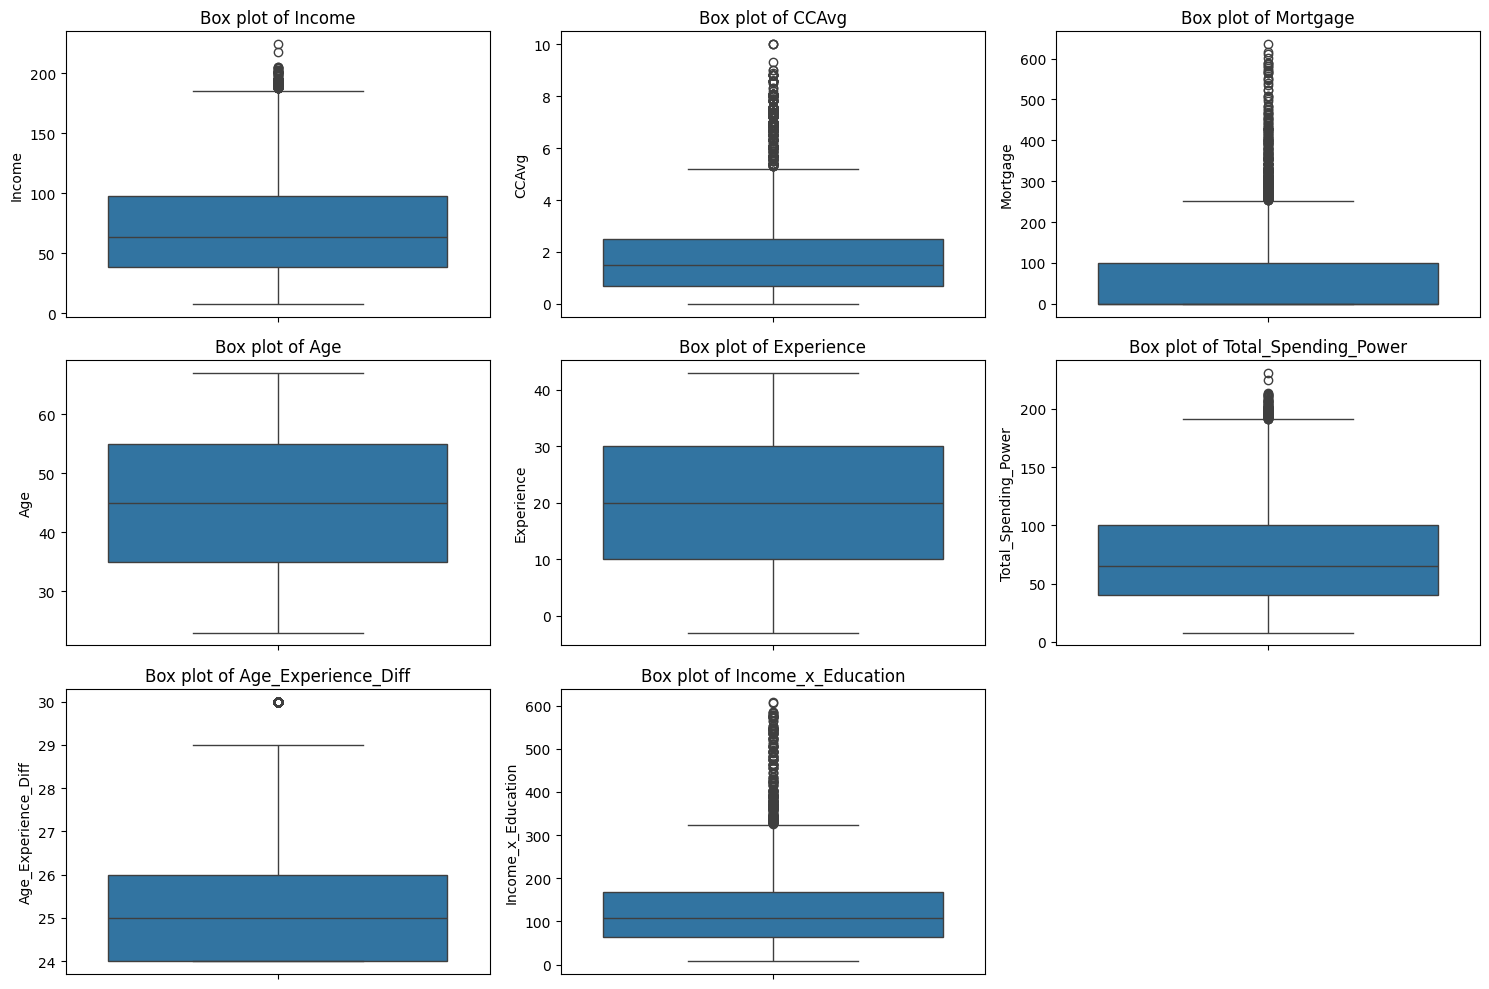

In [27]:
outlier_features = ['Income', 'CCAvg', 'Mortgage', 'Age', 'Experience', 'Total_Spending_Power', 'Age_Experience_Diff', 'Income_x_Education']

plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Capping for Skewed Distributions
Features: Income, CCAvg, Mortgage, Total_Spending_Power, Income_x_Education.
Percentile Choice: 99th percentile

In [28]:
# Using the 99th percentile as discussed
numerical_cols_to_cap = ['Income', 'CCAvg', 'Mortgage', 'Total_Spending_Power', 'Income_x_Education']
percentile_threshold = 99

print(f"Applying capping at the {percentile_threshold}th percentile for: {numerical_cols_to_cap}\n")

for col in numerical_cols_to_cap:
    upper_bound = df[col].quantile(percentile_threshold / 100)
    df[col] = df[col].clip(upper=upper_bound)
    print(f"Capped outliers in '{col}' at the {percentile_threshold}th percentile ({upper_bound:.2f}).")


Applying capping at the 99th percentile for: ['Income', 'CCAvg', 'Mortgage', 'Total_Spending_Power', 'Income_x_Education']

Capped outliers in 'Income' at the 99th percentile (193.00).
Capped outliers in 'CCAvg' at the 99th percentile (8.00).
Capped outliers in 'Mortgage' at the 99th percentile (431.01).
Capped outliers in 'Total_Spending_Power' at the 99th percentile (197.90).
Capped outliers in 'Income_x_Education' at the 99th percentile (525.00).


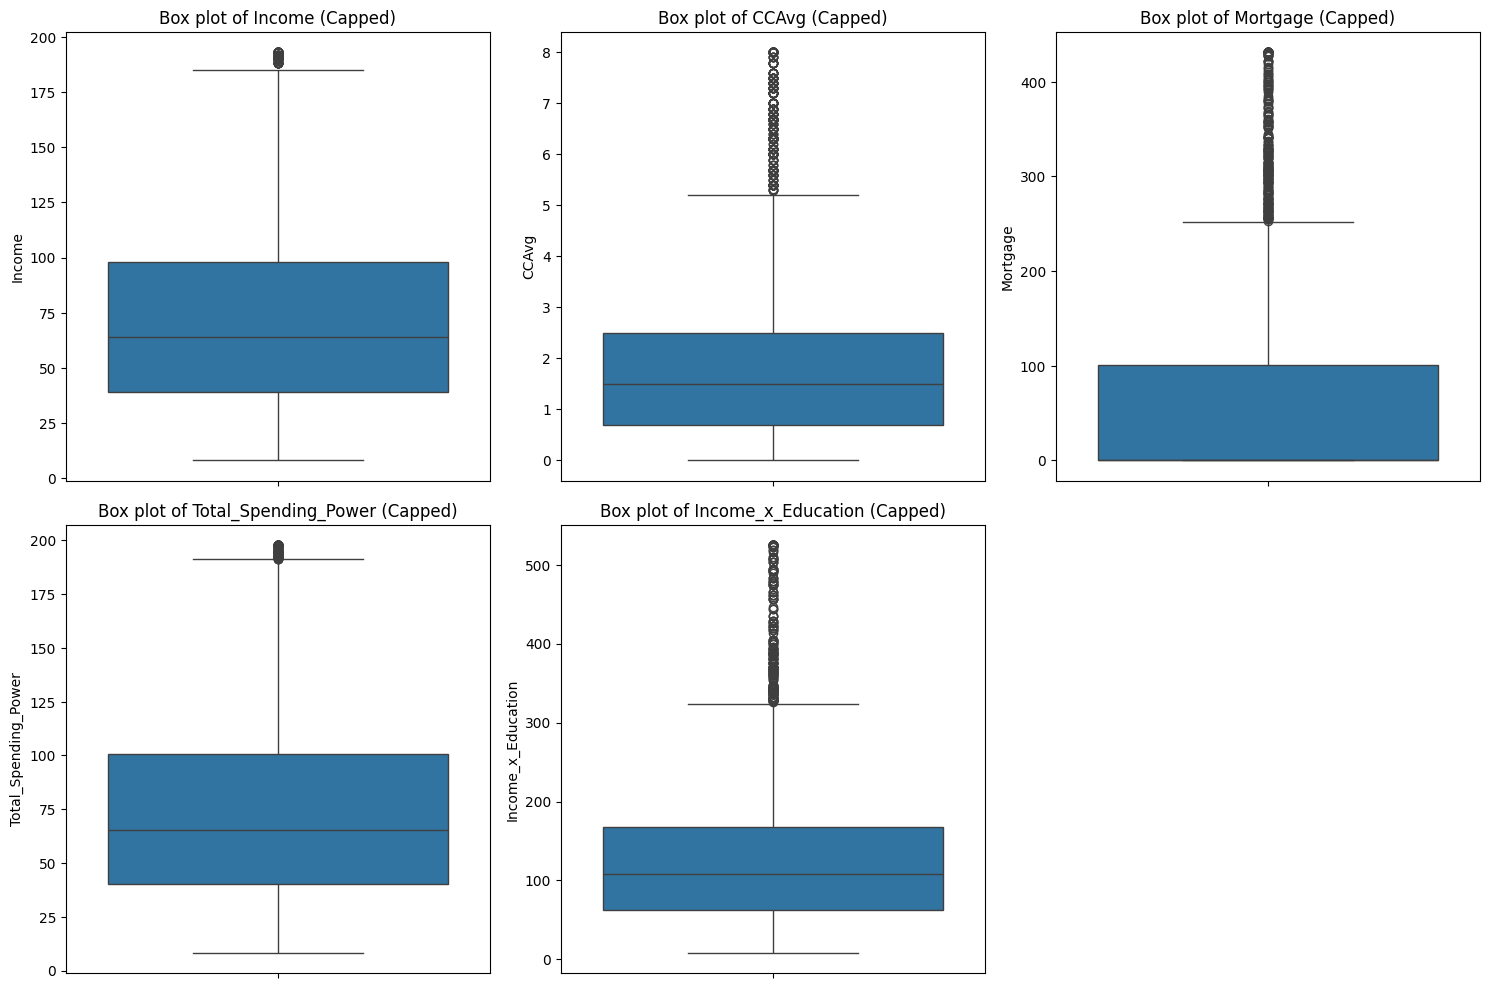

In [29]:
# Verify capping by re-plotting box plots or checking max values
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_cap):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} (Capped)')
plt.tight_layout()
plt.show()


Exploring capping at the 95th percentile for: ['CCAvg', 'Mortgage', 'Income_x_Education']

Capped outliers in 'CCAvg' at the 95th percentile (6.00).
Capped outliers in 'Mortgage' at the 95th percentile (272.00).
Capped outliers in 'Income_x_Education' at the 95th percentile (339.00).


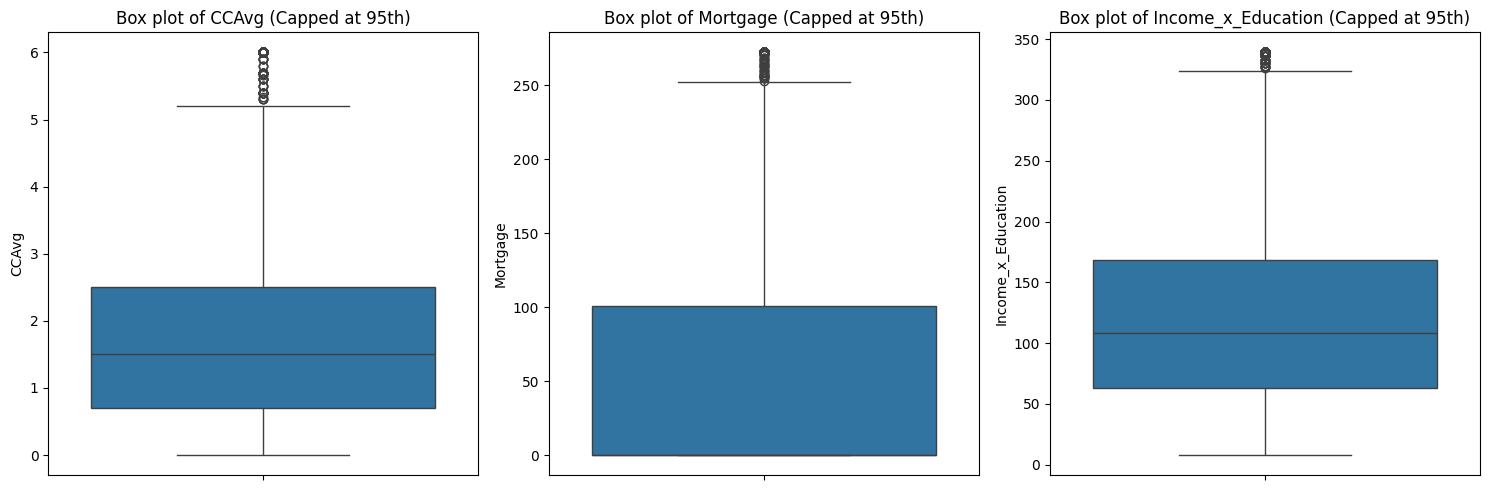

In [30]:
cols_for_95th_percentile = ['CCAvg', 'Mortgage', 'Income_x_Education']
percentile_threshold_95 = 95

print(f"\nExploring capping at the {percentile_threshold_95}th percentile for: {cols_for_95th_percentile}\n")

# Apply 95th percentile capping to specified columns
for col in cols_for_95th_percentile:
    upper_bound = df[col].quantile(percentile_threshold_95 / 100)
    df[col] = df[col].clip(upper=upper_bound)
    print(f"Capped outliers in '{col}' at the {percentile_threshold_95}th percentile ({upper_bound:.2f}).")

plt.figure(figsize=(15, 5)) # Adjust figure size as needed
for i, col in enumerate(cols_for_95th_percentile):
    plt.subplot(1, len(cols_for_95th_percentile), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} (Capped at {percentile_threshold_95}th)')
plt.tight_layout()
plt.show()


# Data Preparation for Modeling
Split data into training and testing sets.

Apply scaling (StandardScaler) to numerical features.

Encode categorical features (OneHotEncoder).

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [34]:
# Separate features (X) and target (y)
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

# Drop irrelevant columns
X.drop(['ID', 'ZIPCode'], axis=1, errors='ignore', inplace=True)

In [35]:
# Identify numerical and categorical features
numerical_features = [
    'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
    'Total_Spending_Power', 'Age_Experience_Diff', 'Income_x_Education'
]

# These are truly categorical features (including binary ones)
categorical_features = [
    'Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'
]

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' to handle unseen categories during testing
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing to the training and testing data
# The preprocessor is part of the final model pipeline or can be fitted and transformed separately
# Here, we just prepare the data for potential pipelines
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Original features shape:", X.shape)
print("Training data shape (after processing):", X_train_processed.shape)
print("Testing data shape (after processing):", X_test_processed.shape)
print("\nNumerical features:", numerical_features)
print("Categorical features:", categorical_features)

Original features shape: (5000, 15)
Training data shape (after processing): (4000, 23)
Testing data shape (after processing): (1000, 23)

Numerical features: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Total_Spending_Power', 'Age_Experience_Diff', 'Income_x_Education']
Categorical features: ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


## Model Building

## Model Evaluation Criterion

### **Problem: Data Imbalance**

Predicting personal loan acceptance means dealing with **imbalanced data**—many customers decline, few accept. This makes standard **accuracy misleading**. For instance, a model predicting "No" every time could be 99% accurate but entirely miss the actual loan takers, making it useless to the bank. We need metrics that find this crucial minority group.

### **Our Key Success Metrics**

We'll evaluate our model using a **Confusion Matrix** and focus on:

* **Recall (Sensitivity)**: How many *actual* loan acceptors did we successfully identify? This is critical for the bank to find every potential lead and maximize loan business.
* **Precision**: Of those we *predicted* would accept, how many actually did? This measures efficiency, helping marketing avoid wasted effort.
* **F1-Score**: A single score balancing both Precision and Recall. We use it to ensure overall model quality, balancing finding all potential customers with efficient targeting.

### **Our Strategy**

Our primary aim is to **maximize Recall** to identify the broadest pool of interested customers. We'll then use **F1-Score and Precision** to ensure the model delivers an efficient and practical solution for the bank's marketing campaigns.

### Model Building

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)

dt_model.fit(X_train_processed, y_train)

print("Decision Tree Classifier initialized and trained successfully.")
print(f"Model parameters: {dt_model.get_params()}")

Decision Tree Classifier initialized and trained successfully.
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = dt_model.predict(X_test_processed)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("\n--- Model Performance on the Test Set ---")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


--- Model Performance on the Test Set ---

Confusion Matrix:
[[897   7]
 [  6  90]]

Metrics:
Accuracy: 0.9870
Precision: 0.9278
Recall: 0.9375
F1-Score: 0.9326


#### **--- Overview of Model Performance ---**

Accuracy came in at **0.9870**. But with our imbalanced data, other metrics tell a fuller story.

Our **Confusion Matrix** looks like this:
* **Correctly found "Yes" (True Positives): 90**
* **Correctly found "No" (True Negatives): 897**
* **Predicted "Yes," but it was "No" (False Positives): 7**
* **Predicted "No," but it was "Yes" (False Negatives): 6**

Let's break down what these mean for the bank:

* **Recall: 0.9375**

* **Precision: 0.9278**

* **F1-Score: 0.9326**

**Bottom Line**: Our model does a really good job finding potential loan customers (high Recall) while still being pretty efficient with marketing efforts (good Precision). The balance we hit should work well for the bank's goals, but they can always fine-tune based on how much they value catching every lead versus minimizing wasted marketing.

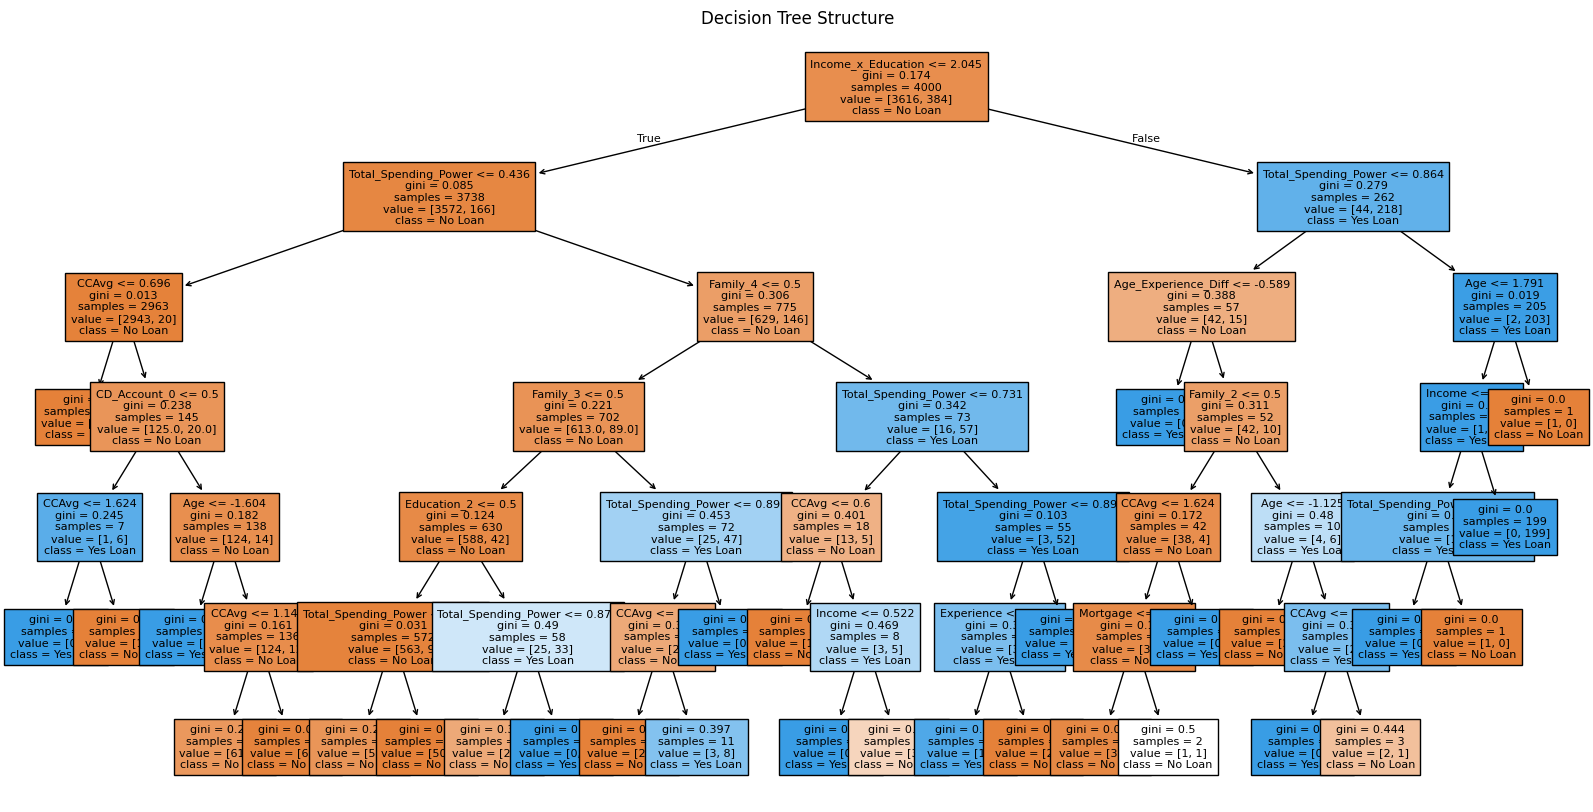

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)), class_names=['No Loan', 'Yes Loan'], fontsize=8)
plt.title("Decision Tree Structure")
plt.show()


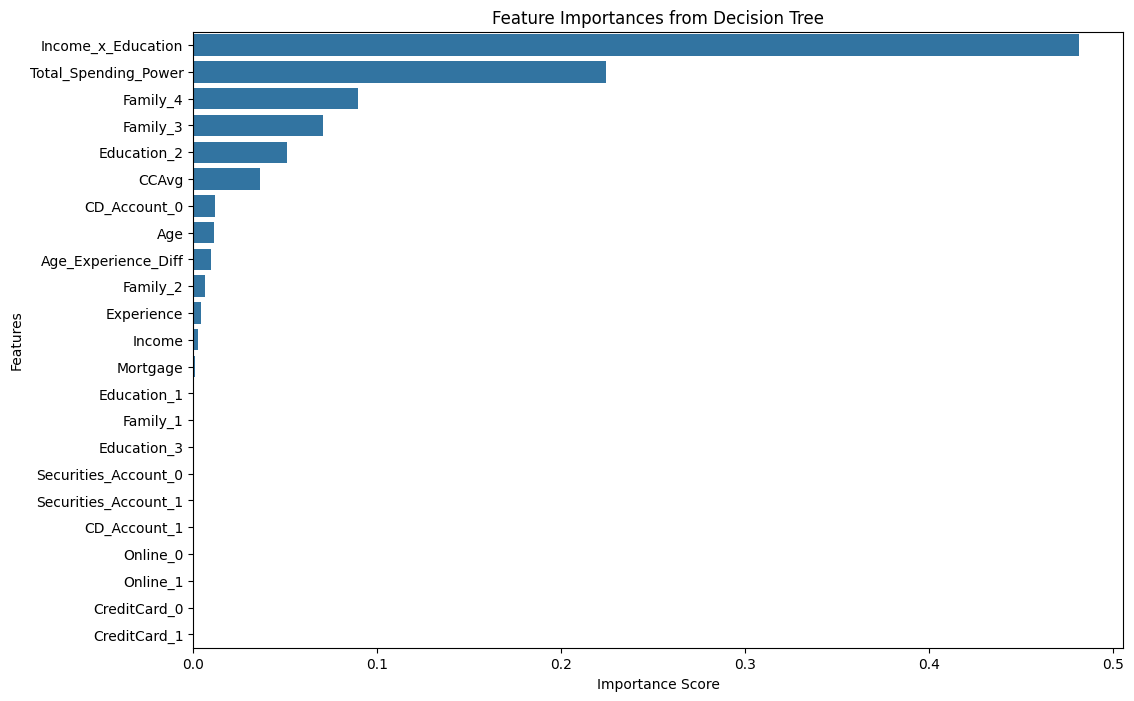

In [51]:
feature_importances = pd.Series(dt_model.feature_importances_, index=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [50]:
print("\n--- Feature Importances from Decision Tree ---")
print(feature_importances)


--- Feature Importances from Decision Tree ---
Income_x_Education      0.481216
Total_Spending_Power    0.224250
Family_4                0.089610
Family_3                0.070321
Education_2             0.051061
CCAvg                   0.036131
CD_Account_0            0.012053
Age                     0.011164
Age_Experience_Diff     0.009427
Family_2                0.006519
Experience              0.004277
Income                  0.002757
Mortgage                0.001214
Education_1             0.000000
Family_1                0.000000
Education_3             0.000000
Securities_Account_0    0.000000
Securities_Account_1    0.000000
CD_Account_1            0.000000
Online_0                0.000000
Online_1                0.000000
CreditCard_0            0.000000
CreditCard_1            0.000000
dtype: float64


### **--- Reviewing Feature Importances ---**

The feature importances from our Decision Tree model tell us which factors were important for predicting if someone takes a loan. The bar plot clearly shows which ones drove the decisions most.

**Connecting to Our Earlier Findings in EDA:**

We saw this play out in our initial data exploration
* Features like **Income, CCAvg, Education, and CD Account** really popped in our bivariate plots, showing clear differences between people who took loans and those who didn't. We are seeing that the model pick up on that same strong signal here.
* This alignment between what the model found and what we saw in the EDA confirms our initial ideas about what influences personal loan acceptance.
* If anything looked different, it'd mean the model found more complex patterns that weren't obvious at first glance, but here we aren't seeing anything out of the ordinary.

## Model Performance Improvement

# Model Improvement by Pruning
Try pruning the Decision Tree to prevent overfitting and improve generalization. This often involves setting parameters like max_depth or min_samples_leaf. Use techniques like cross-validation to find optimal parameters.

In [73]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

best_dt_model = None
best_params = None
y_pred_pruned = None
conf_matrix_pruned = None
accuracy_pruned = None
precision_pruned = None
recall_pruned = None
f1_pruned = None

def use_param_grid_to_pruned_model(param_grid):
  global best_dt_model, best_params, y_pred_pruned, conf_matrix_pruned, accuracy_pruned, precision_pruned, recall_pruned, f1_pruned
  # Print the parameter grid
  print("\n--- Parameter Grid for GridSearchCV ---")
  print(param_grid)

  # Initialize the Decision Tree Classifier
  dt_grid = DecisionTreeClassifier()

  # Initialize StratifiedKFold for cross-validation
  cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Initialize GridSearchCV
  # Using 'f1' as the scoring metric because it balances Precision and Recall,
  # which is suitable for our imbalanced dataset.
  grid_search = GridSearchCV(
      estimator=dt_grid,
      param_grid=param_grid,
      cv=cv_strategy,
      scoring='f1',  # or 'recall' if maximizing recall is the absolute priority
      n_jobs=-1,     # Use all available cores
      verbose=1      # Print progress
  )

  # Fit GridSearchCV on the processed training data
  print("\nStarting GridSearchCV to find optimal Decision Tree hyperparameters...")
  grid_search.fit(X_train_processed, y_train)

  print("\nGridSearchCV completed.")

  # Get the best parameters found by GridSearchCV
  best_params = grid_search.best_params_
  print("\nBest hyperparameters found by GridSearchCV:")
  print(best_params)

  # Get the best model
  best_dt_model = grid_search.best_estimator_
  print("\nBest Decision Tree model:")
  print(best_dt_model)

  # Evaluate the best pruned model on the test set
  print("\nEvaluating the best pruned model on the test set...")
  y_pred_pruned = best_dt_model.predict(X_test_processed)

  # Calculate evaluation metrics for the pruned model
  conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
  accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
  precision_pruned = precision_score(y_test, y_pred_pruned)
  recall_pruned = recall_score(y_test, y_pred_pruned)
  f1_pruned = f1_score(y_test, y_pred_pruned)

  # Print the evaluation metrics for the pruned model
  print("\n--- Performance of the Best Pruned Decision Tree Model on the Test Set ---")
  print("\nConfusion Matrix:")
  print(conf_matrix_pruned)
  print("\nMetrics:")
  print(f"Accuracy: {accuracy_pruned:.4f}")
  print(f"Precision: {precision_pruned:.4f}")
  print(f"Recall: {recall_pruned:.4f}")
  print(f"F1-Score: {f1_pruned:.4f}")

  print("\n--- Comparison with Initial Model ---")
  print("Initial Model:")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print(f"  F1-Score: {f1:.4f}")
  print("\nPruned Model:")
  print(f"  Accuracy: {accuracy_pruned:.4f}")
  print(f"  Precision: {precision_pruned:.4f}")
  print(f"  Recall: {recall_pruned:.4f}")
  print(f"  F1-Score: {f1_pruned:.4f}")

In [74]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 15],
    'random_state': [42]
}

use_param_grid_to_pruned_model(param_grid)


--- Parameter Grid for GridSearchCV ---
{'max_depth': [3, 5, 7, 10, 15], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8, 15], 'random_state': [42]}

Starting GridSearchCV to find optimal Decision Tree hyperparameters...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

GridSearchCV completed.

Best hyperparameters found by GridSearchCV:
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}

Best Decision Tree model:
DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=42)

Evaluating the best pruned model on the test set...

--- Performance of the Best Pruned Decision Tree Model on the Test Set ---

Confusion Matrix:
[[899   5]
 [  7  89]]

Metrics:
Accuracy: 0.9880
Precision: 0.9468
Recall: 0.9271
F1-Score: 0.9368

--- Comparison with Initial Model ---
Initial Model:
  Accuracy: 0.9870
  Precision: 0.9278
  Recall: 0.9375
  F1-Score: 0.9326

Pruned Model:
  Accuracy: 0.9880
  Precision: 0.9468
  Recall

Rerun the pruning with tighter parameter grid surrounding the best parameters.

In [75]:
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3],
    'random_state': [42]
}

use_param_grid_to_pruned_model(param_grid)


--- Parameter Grid for GridSearchCV ---
{'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_split': [3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3], 'random_state': [42]}

Starting GridSearchCV to find optimal Decision Tree hyperparameters...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

GridSearchCV completed.

Best hyperparameters found by GridSearchCV:
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 42}

Best Decision Tree model:
DecisionTreeClassifier(max_depth=7, min_samples_split=6, random_state=42)

Evaluating the best pruned model on the test set...

--- Performance of the Best Pruned Decision Tree Model on the Test Set ---

Confusion Matrix:
[[900   4]
 [  7  89]]

Metrics:
Accuracy: 0.9890
Precision: 0.9570
Recall: 0.9271
F1-Score: 0.9418

--- Comparison with Initial Model ---
Initial Model:
  Accuracy: 0.9870
  Precision: 0.9278
  Recall: 0.9375
  F1-Score: 0.9326

Pruned Model:
  Accuracy: 0.9890
  Precision: 0.9570
  Recall: 0.9

### **--- Discussion of Pruning Results ---**

We used `GridSearchCV` to fine-tune our Decision Tree, aiming for the best settings (`max_depth`, `min_samples_split`, `min_samples_leaf`). We focused on `F1-score` because our data is imbalanced.

The best setup we found was: `{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}`. We then put this optimized model to the test on unseen data.

#### **How the Metrics Changed:**

Compared to our first model:
* **F1-Score**: Improved, going from 0.9326 to **0.9418**.
  * This shows a better overall balance.
* **Recall**: Dropped a little, from 0.9375 to **0.9271**.
  * We missed slightly more actual loan acceptors, which is often a trade-off.
* **Precision**: Increased nicely, from 0.9278 to **0.9570**.
  * This means when our model predicts a loan acceptance, it's even more likely to be correct. Great for efficient marketing.

#### **The Takeaway:**

Pruning with `GridSearchCV` definitely made our Decision Tree stronger. It improved the model's stability and overall performance on new data, hitting a better balance for the bank's goals.

## Model Performance Comparison and Final Model Selection


--- Model Performance Comparison ---
                       Model  Accuracy  Precision    Recall  F1-Score
0     Unpruned Decision Tree     0.987   0.927835  0.937500  0.932642
1  Best Pruned Decision Tree     0.989   0.956989  0.927083  0.941799


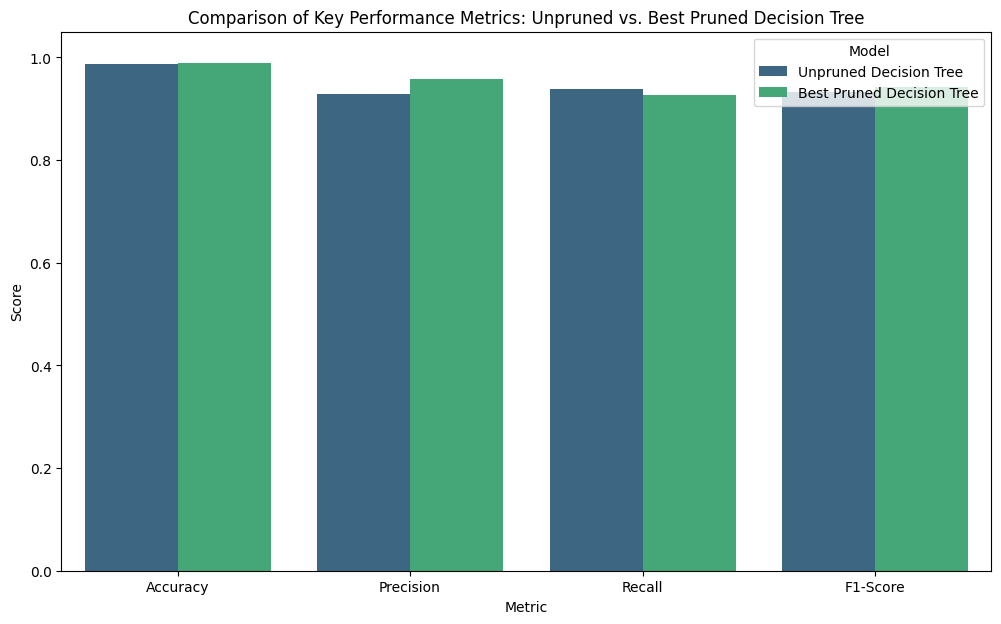

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

metrics_data = {
    'Model': ['Unpruned Decision Tree', 'Best Pruned Decision Tree'],
    'Accuracy': [accuracy, accuracy_pruned],
    'Precision': [precision, precision_pruned],
    'Recall': [recall, recall_pruned],
    'F1-Score': [f1, f1_pruned]
}

metrics_df = pd.DataFrame(metrics_data)

print("\n--- Model Performance Comparison ---")
print(metrics_df)

metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted, palette='viridis')
plt.title('Comparison of Key Performance Metrics: Unpruned vs. Best Pruned Decision Tree')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.show()

### **--- Conclusion on Model Performance ---**

So, looking at F1-Scores, our **Pruned Decision Tree** (0.9418) clearly beats the initial unpruned one (0.9326).

**Enhancements**
* **Less Overfitting**
* **Smarter Balance**: better overall balance with higher `F1-Score`
* **More Efficient Marketing**: higher `Precision` = model predictions on loan acceptance are far more likely to be correct, leading to more efficient marketing.

The pruned model is definitely our stronger, more reliable choice for predicting loan acceptance.

### **--- Final Model Selection and Reasoning ---**

So, after comparing everything, we're going with the **Best Pruned Decision Tree** as our final model.

**Reasoning**
* **Performs better**
  * Its F1-Score (0.9418) on unseen data was clearly higher than our first unpruned model (0.9326). This F1-Score is really important because it balances finding all the loan acceptance with being efficient, especially with our kind of data.
* **More reliable**
  * Pruning keeps the model from "memorizing" the training data too much. By finding the best settings, we built a model that we can trust to perform well on new customers in future campaigns.
* **Better for the bank's goal**
  * We need a model that finds lots of potential loan customers (good Recall) but is also efficient (good Precision). The pruned model gives us a much better balance here and is tougher against overfitting.

That's why it's the best pick for targeting personal loan customers.

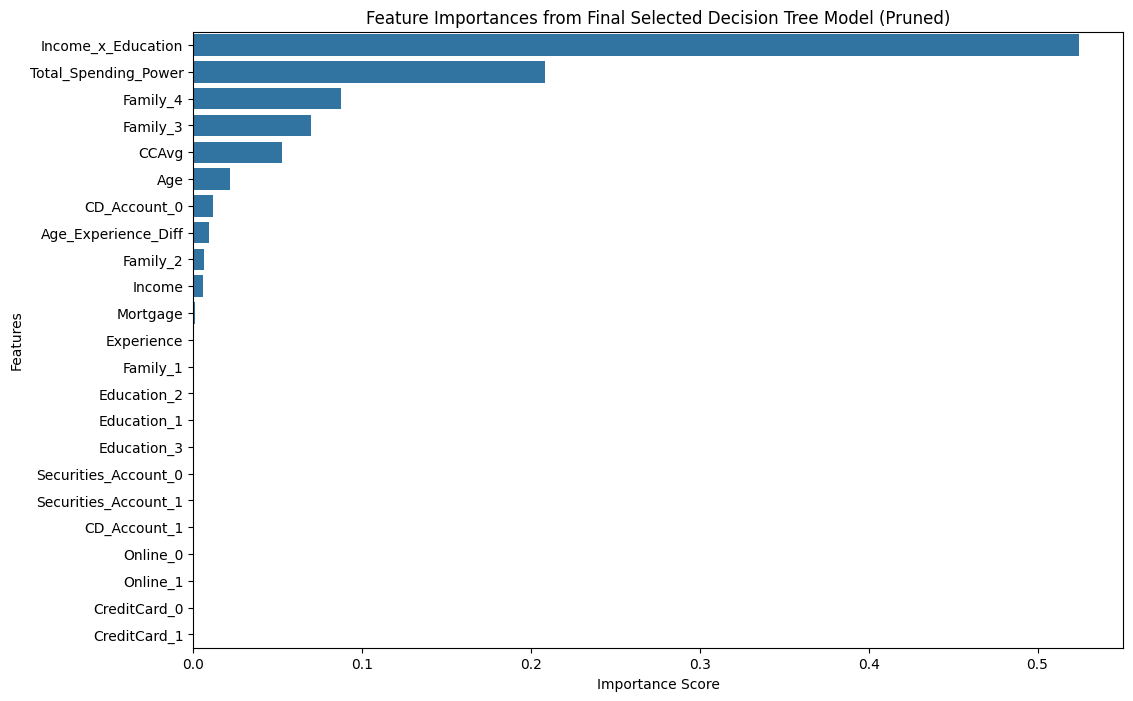


--- Feature Importances from Final Selected Decision Tree Model (Pruned) ---
Income_x_Education      0.524458
Total_Spending_Power    0.208541
Family_4                0.087814
Family_3                0.069714
CCAvg                   0.052837
Age                     0.022049
CD_Account_0            0.011811
Age_Experience_Diff     0.009238
Family_2                0.006389
Income                  0.005960
Mortgage                0.001189
Experience              0.000000
Family_1                0.000000
Education_2             0.000000
Education_1             0.000000
Education_3             0.000000
Securities_Account_0    0.000000
Securities_Account_1    0.000000
CD_Account_1            0.000000
Online_0                0.000000
Online_1                0.000000
CreditCard_0            0.000000
CreditCard_1            0.000000
dtype: float64


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

final_feature_importances = pd.Series(best_dt_model.feature_importances_,
                                       index=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
                                       ).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=final_feature_importances, y=final_feature_importances.index)
plt.title('Feature Importances from Final Selected Decision Tree Model (Pruned)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\n--- Feature Importances from Final Selected Decision Tree Model (Pruned) ---")
print(final_feature_importances)


### **--- Feature Importances & Customer Attributes ---**

The feature importances from our final Decision Tree model tell us which customer traits were the most important for predicting loan acceptance. The bar plot and list show their impact:

* **Income_x_Education** (Score: 0.5245)
  * how much someone earns really depends on their education level when it comes to taking a loan.
* **Total_Spending_Power** (Score: 0.2085)
  * having money *and* spending it is a huge predictor.
* **Family_4** (Score: 0.0878)
* **Family_3** (Score: 0.0697)
  * Larger families seems to become key indicators of pursuing loans
* **CCAvg** (Score: 0.0528)
  * How much they spend on credit cards is a big clue about their financial habits or capacity.

#### **Engineered Features Show High Importance**

You might notice that engineered features, like `Income_x_Education` and `Total_Spending_Power`, show very high importance.

* **Combine Predictive Power**: We created these features to capture the joint effect or relationship between two or more original features. For example, `Income_x_Education` tells the model how income behaves *differently* across education levels.
* **Stronger, More Direct Signals**: These combined features often provide a much clearer and more potent signal to the model than individual features alone. The Decision Tree can make more effective splits directly on these consolidated insights, which makes them appear more "important." They essentially do more "work" for the model in one step.
* **Intuitive for the Business**: These engineered features, like "Total Spending Power", just make more direct sense for the business problem, representing a strong indicator of customer behavior.

#### In Conclusion

**Overall**: Our model found that financial metrics like **income and spending**, combined with categorical profiles like **education** and **family size**, are the biggest drivers for loan acceptance. This matches what we saw in our initial data exploration. Focusing on these attributes will definitely help find good loan customers.

---
## Actionable Insights and Business Recommendations


### **Key Takeaways & Actionable Insights**

Our model shows what drives personal loan acceptance. The most important factors are **Income, Credit Card Spending (CCAvg), Education, CD Account, Family Size, and Mortgage.**

#### **Top Customer Segments to Target**

1.  **High-Income, High-Spending Customers**:
    * **Insight**: These customers (e.g., Income > $100k-$150k, CCAvg > $2k-$3k) have strong financial capacity.
    * **Why**: They can afford loans and likely have financial needs.
2.  **Highly Educated Customers**:
    * **Insight**: 'Advanced/Professional' and 'Graduate' degree holders are more likely to accept.
    * **Why**: Correlates with higher earning potential and financial literacy.
3.  **CD Account Holders**:
    * **Insight**: Customers with Certificate of Deposit (CD) accounts are very receptive.
    * **Why**: They already trust the bank and are open to other financial products.
4.  **Family Size & Mortgage Value**:
    * **Insight**: Secondary factors. Certain family sizes or existing mortgages influence loan needs.
    * **Why**: Reflects household expenses and financial commitments.

#### **Core Customer Profile for Loans**

Customers most likely to accept a personal loan have:
* High Income
* High Credit Card Spending (CCAvg)
* Advanced or Graduate Education
* A CD Account with the bank

---
* What recommedations would you suggest to the bank?



### **Business Recommendations for AllLife Bank**

To significantly increase loan acceptance beyond 9%, focus on these strategies:

1.  **Target Core Segments**:
    * **Action**: Prioritize customers with **High Income, High CCAvg, Higher Education, and CD Accounts.**
    * **Strategy**: Use internal data to find these top potential customers.
2.  **Leverage Existing Relationships**:
    * **Action**: Actively cross-sell to **CD Account holders**.
    * **Strategy**: Propose loans when their CDs mature or create special loyalty programs.
3.  **Personalization and Optimized Outreach based on more Data**:
    * **Action**: Try to target high-priority (or likely to convert) customers with more tailored campaigns using customer profile data that are relevant to their spending needs. Study Behavioral Data to optimize outreach. For customers using **online banking**, promote loans through digital channels (app, website).
    * **Strategy**: Study the core customers by shifting towards obtaining more data. Then create strategies that are relevant like:
      * Build a more personalized campaign to increase likelihood for targetted customers to convert.
      * Emphasize easy online application and management for inclusive opportunity.
4.  **Continuous Model Monitoring & Improvement**:
    * **Action**: Continuously track campaign performance and conversion rates with new data.
    * **Strategy**: Use data to refine targeting and messaging over time.

In [85]:
output_path = '/content/drive/MyDrive/Colab/ML Proj 2/AIML_ML_Project_full_code_notebook.html'

try:
    from google.colab import output
    print("Running in Google Colab environment.")

    !jupyter nbconvert --to html "/content/drive/MyDrive/Colab/ML Proj 2/AIML_ML_Project_full_code_notebook.ipynb"

    print(f"\nNotebook successfully exported as HTML to: {output_path}")

except ImportError:
    print("Not running in Google Colab. HTML export using !jupyter nbconvert requires a Jupyter-like environment.")
    print("To export outside Colab/Jupyter, you would typically use a similar command in your terminal.")

Running in Google Colab environment.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab/ML Proj 2/AIML_ML_Project_full_code_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 25 image(s).
[NbConvertApp] Writing 2075481 bytes to /content/drive/MyDrive/Colab/ML Proj 2/AIML_ML_Project_full_code_notebook.html

Notebook successfully exported as HTML to: /content/drive/MyDrive/Colab/ML Proj 2/AIML_ML_Project_full_code_notebook.html


___